#  IRIS Flower Classification 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv("iris.csv")

In [4]:
df.head(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [5]:
df.shape

(150, 6)

###### Here we can see that there are 150 rows and 6 column in pur dataset

# Data Description

In [6]:
df.drop(df.columns[0],axis=1,inplace=True)

In [7]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization 

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64


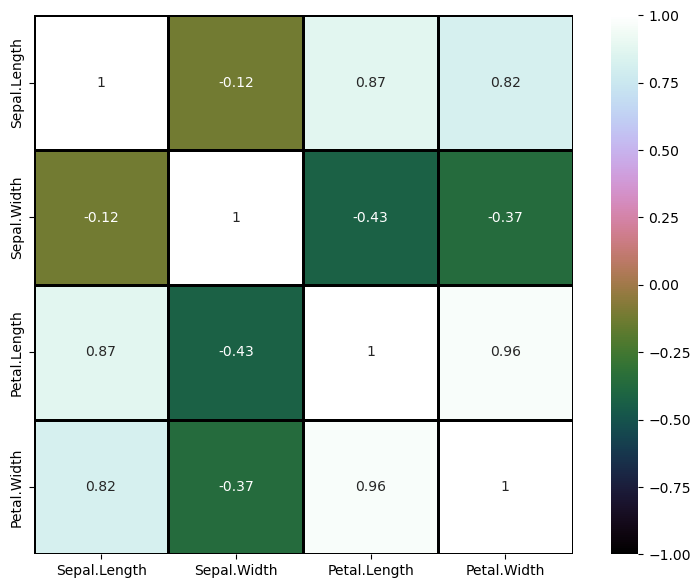

In [10]:
print(df.isnull().sum())
fig = plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(df.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"})

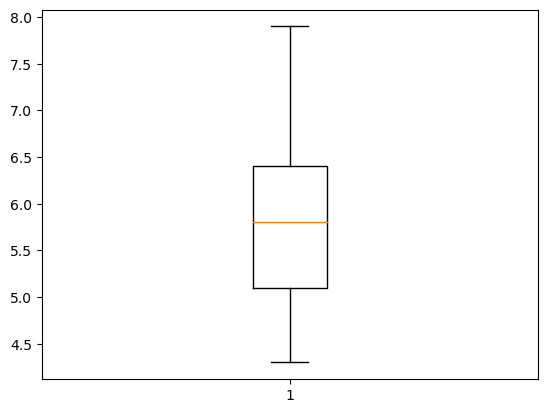

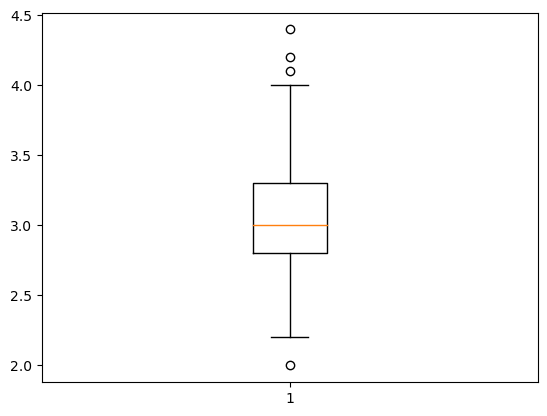

In [11]:
plt.figure(1)
plt.boxplot([df['Sepal.Length']])
plt.figure(2)
plt.boxplot([df['Sepal.Width']])
plt.show()

<AxesSubplot:xlabel='Species', ylabel='Sepal.Width'>

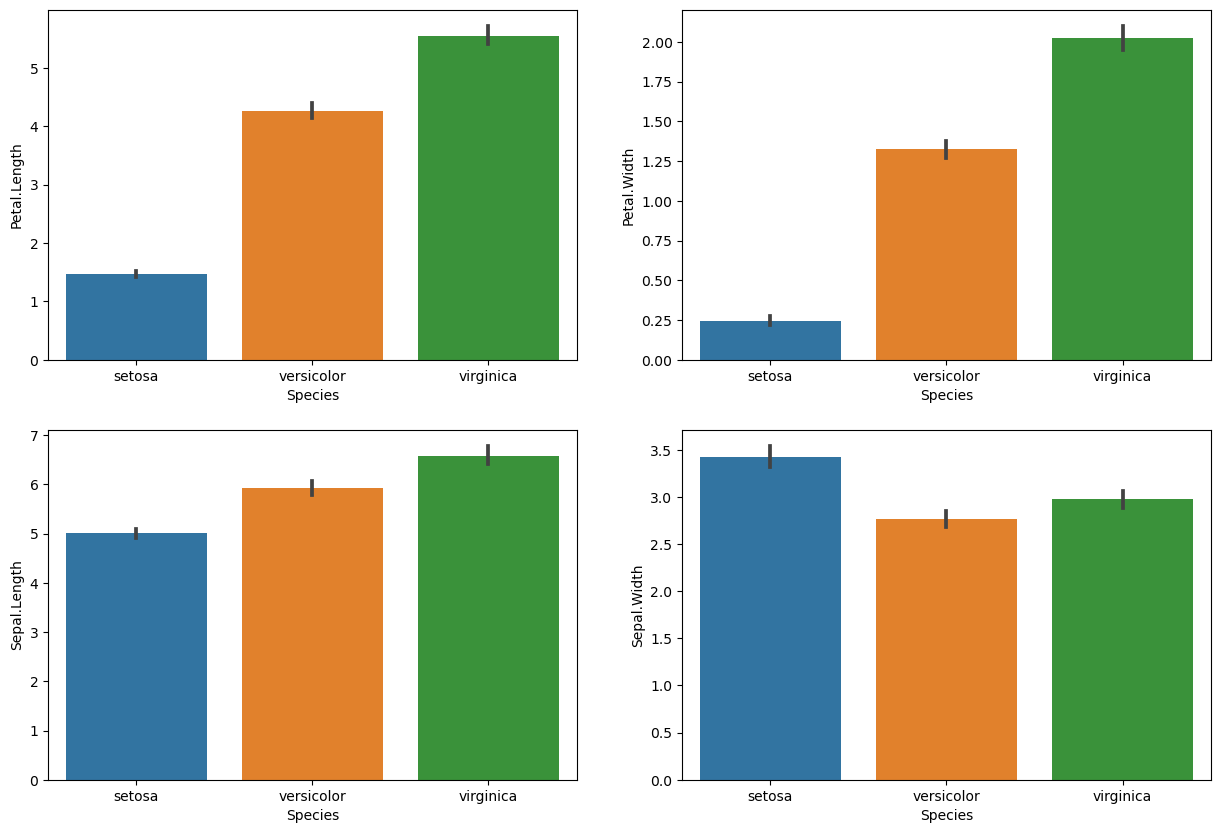

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(x='Species',y='Petal.Length',data=df)
plt.subplot(2,2,2)
sns.barplot(x='Species',y='Petal.Width',data=df)
plt.subplot(2,2,3)
sns.barplot(x='Species',y='Sepal.Length',data=df)
plt.subplot(2,2,4)
sns.barplot(x='Species',y='Sepal.Width',data=df)

<AxesSubplot:xlabel='Petal.Length', ylabel='Sepal.Width'>

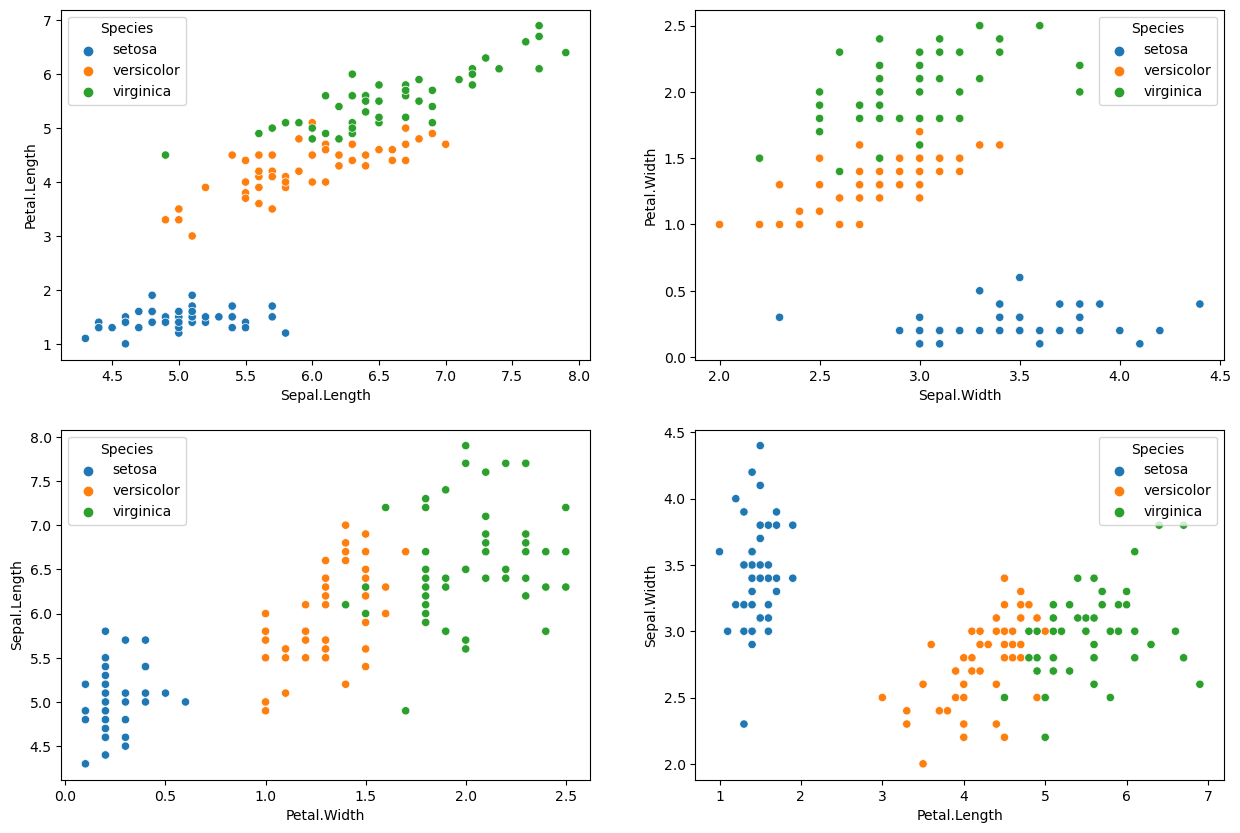

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x='Sepal.Length',y='Petal.Length',hue ="Species",data=df)
plt.subplot(2,2,2)
sns.scatterplot(x='Sepal.Width',y='Petal.Width',hue ="Species",data=df)
plt.subplot(2,2,3)
sns.scatterplot(x='Petal.Width',y='Sepal.Length',hue ="Species",data=df)
plt.subplot(2,2,4)
sns.scatterplot(x='Petal.Length',y='Sepal.Width',hue ="Species",data=df)

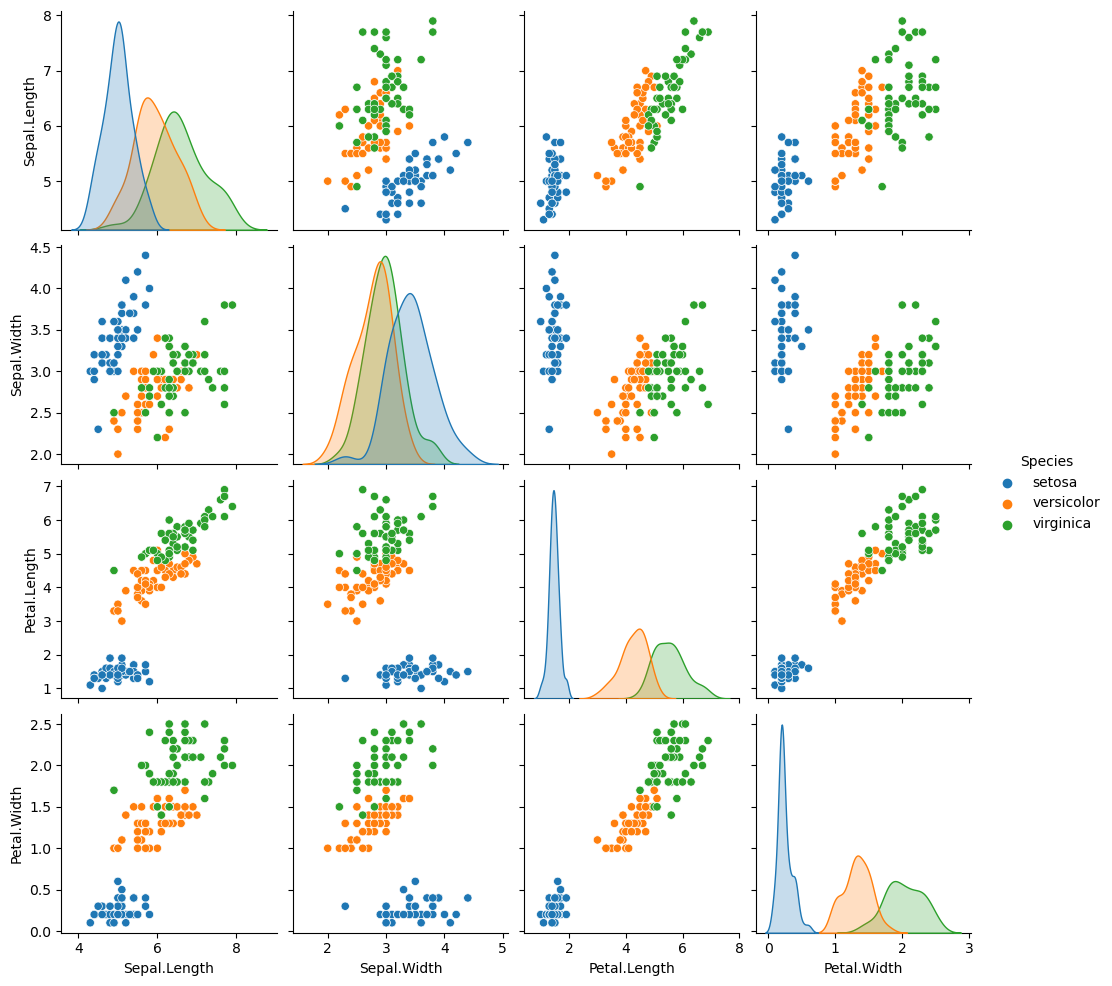

In [15]:
sns.pairplot(df, hue='Species') # here we are visualizing whole dataset 

# Training the Model 

In [16]:
X = df[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
y = df.Species

In [17]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) 

In [19]:
X_train.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
94,5.6,2.7,4.2,1.3
135,7.7,3.0,6.1,2.3
21,5.1,3.7,1.5,0.4
22,4.6,3.6,1.0,0.2
29,4.7,3.2,1.6,0.2


In [20]:
X_train.shape

(112, 4)

In [21]:
y_train.shape

(112,)

In [22]:
y_train.head()

94     versicolor
135     virginica
21         setosa
22         setosa
29         setosa
Name: Species, dtype: object

#  Model 1 Logistic Regression: 

In [23]:
model1 = LogisticRegression()

model1.fit(X_train,y_train )

prediction = model1.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 1.0


Text(0, 0.5, 'y_pred')

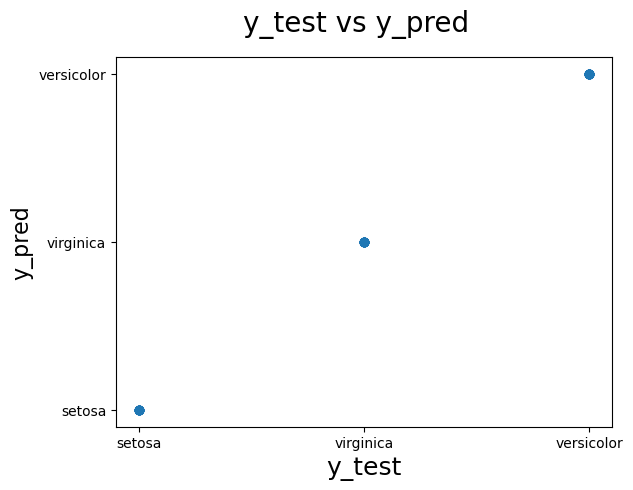

In [24]:
fig = plt.figure()
plt.scatter(y_test,prediction)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)

# Model 2- Support Vector Machine:

Acc= 1.0


In [32]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)

print(classification_report(y_test,prediction2))

Confusion matrix: 
 [[10  0  0]
 [ 0 17  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



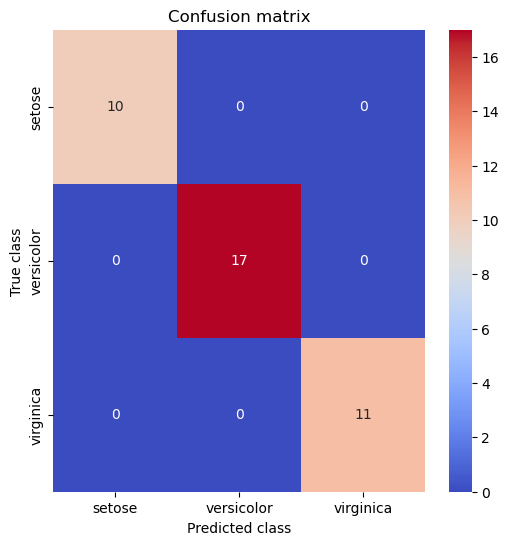

In [39]:
LABELS = ['setose', 'versicolor','virginica']
conf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,cmap = 'coolwarm', annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [36]:
y_test

33         setosa
16         setosa
43         setosa
129     virginica
50     versicolor
123     virginica
68     versicolor
53     versicolor
146     virginica
1          setosa
147     virginica
32         setosa
31         setosa
122     virginica
127     virginica
74     versicolor
88     versicolor
96     versicolor
42         setosa
134     virginica
80     versicolor
48         setosa
90     versicolor
65     versicolor
97     versicolor
64     versicolor
93     versicolor
114     virginica
25         setosa
41         setosa
104     virginica
89     versicolor
116     virginica
82     versicolor
112     virginica
55     versicolor
86     versicolor
61     versicolor
Name: Species, dtype: object

In [37]:
prediction

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

# Model 3 - Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 0.9736842105263158


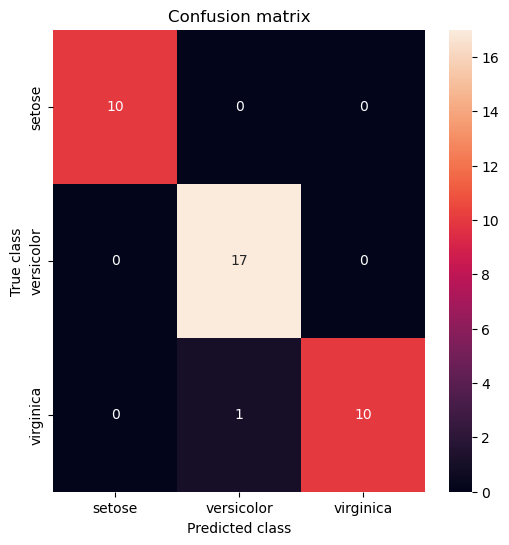

In [40]:
LABELS = ['setose', 'versicolor','virginica']
conf_matrix = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



###### Here according to the scores , for this dataset SVM and Logistic Regression is better than Decision Tree Classification